In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # seaborn 
import matplotlib.pyplot as plt # matplot lib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


Data set source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [2]:
df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(df.shape)
df['furnishingstatus'].unique()

(545, 13)


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

# Cleaning Data and Reformatting Text Input

In [4]:
from pandas.api.types import CategoricalDtype

# convert yes/no to 0/1
yn_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in yn_columns:
    df[col] = (df[col] == 'yes').astype(int)

# convert furnishing status into 0, 1, or 2
category_order = ['unfurnished', 'semi-furnished', 'furnished']
cat_type = CategoricalDtype(categories=category_order, ordered=True)
df['furnishingstatus'] = df['furnishingstatus'].astype(cat_type)
df['furnishingstatus'] = df['furnishingstatus'].cat.codes 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


Area: ft^2 

price: USD

# Exploratory Data Analysis

## Plots Area vs. Price With Categories Labelled 

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


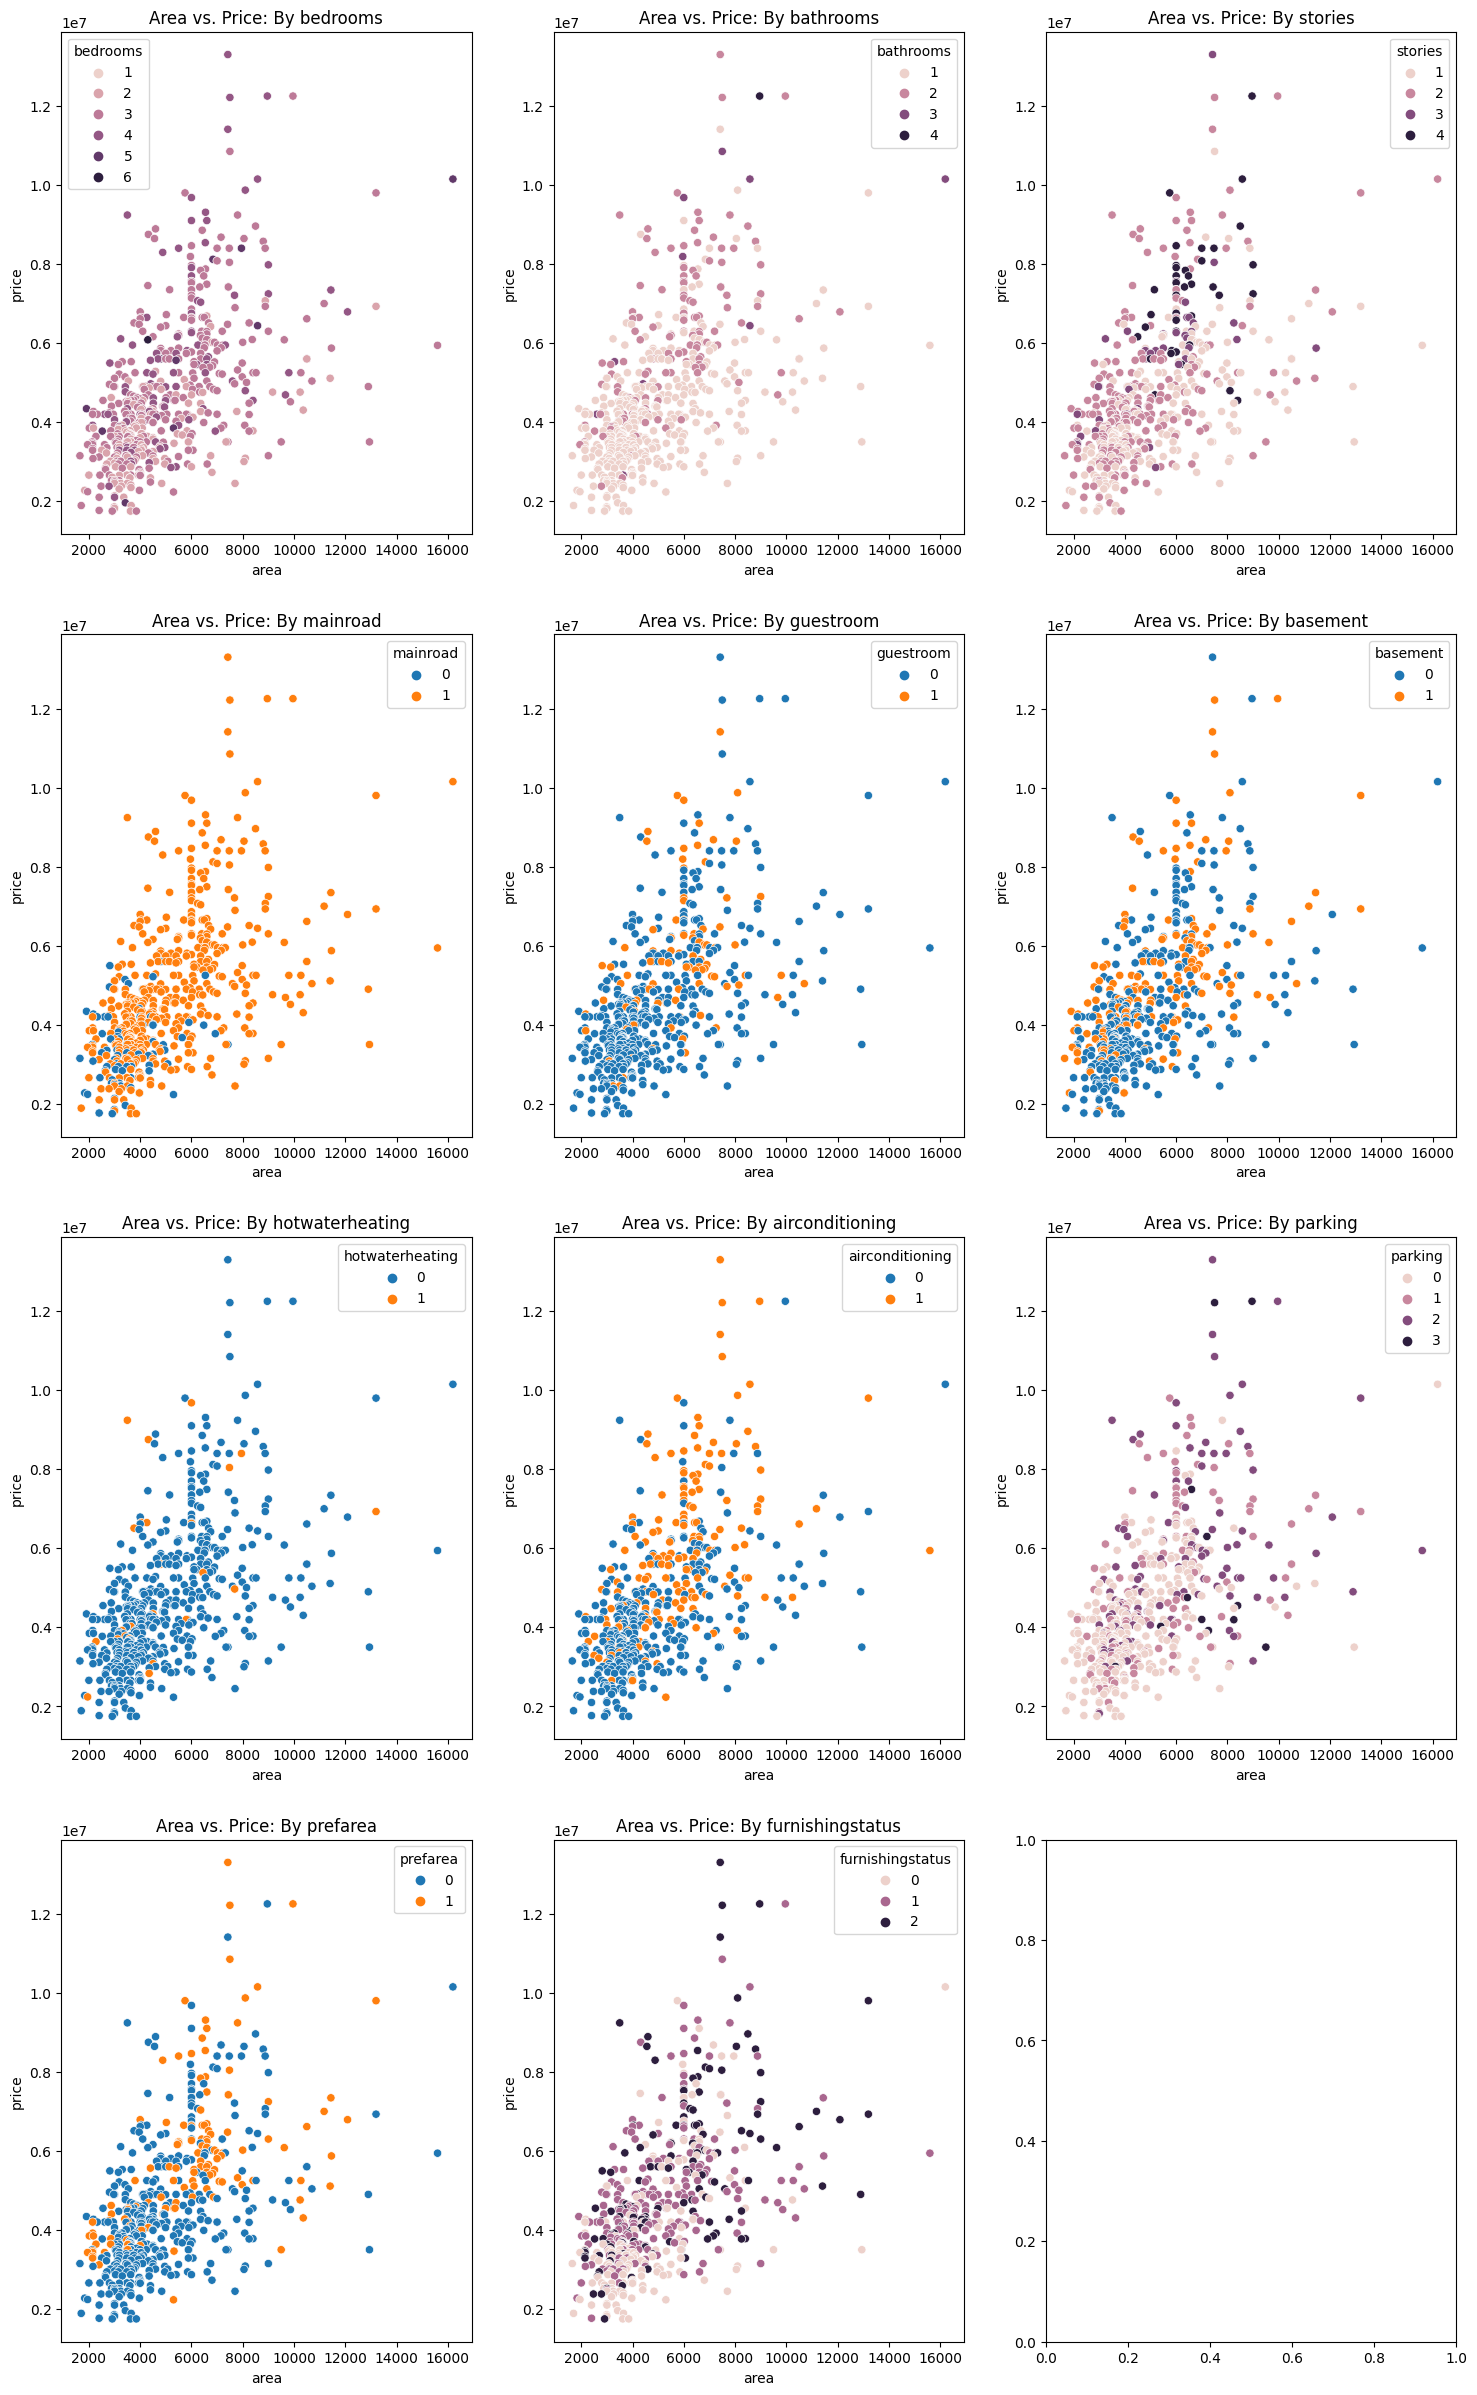

In [6]:
Y = df['price']
x = df['area']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 30))  # Create subplots with 4 row and 3 columns    
columns = df.columns[2:].values

for i in range(11):
    x = i//3
    y = i - (x*3)
    ax = sns.scatterplot(data=df, x="area", y="price", hue=columns[i], ax=axes[x,y])
    ax.set_title('Area vs. Price: By ' + columns[i])

plt.show()

In [7]:
# remove price as thousands
if 'price (thousands)' in df.columns:
    print('hi')
    df.drop(columns=['price (thousands)'], inplace=True)
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2


## Heatmap

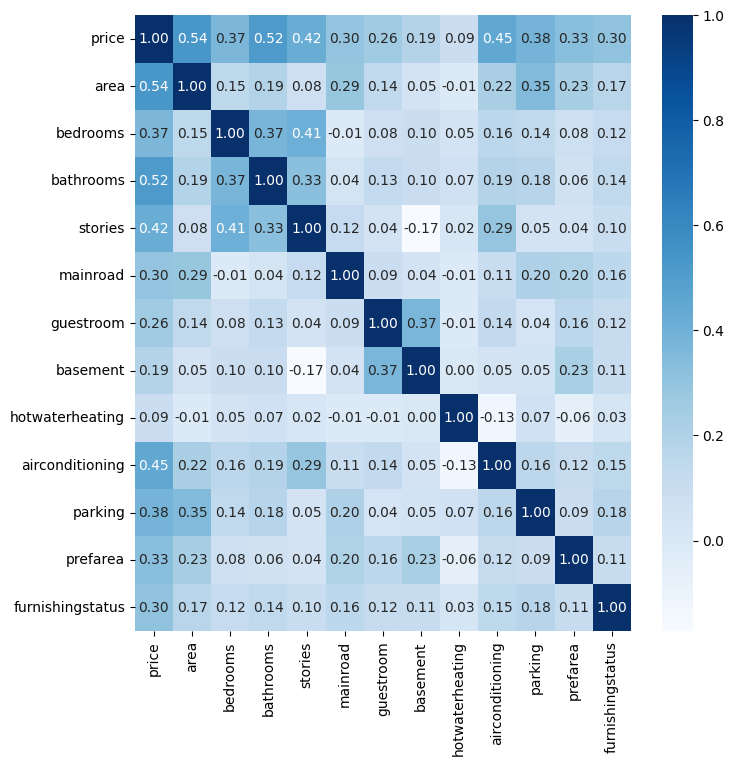

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.show()

graph shows that area, AC, bathrooms are the three most correlated with price

no two features seem to strongly correlated with each other

## Distribution of Categorical Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

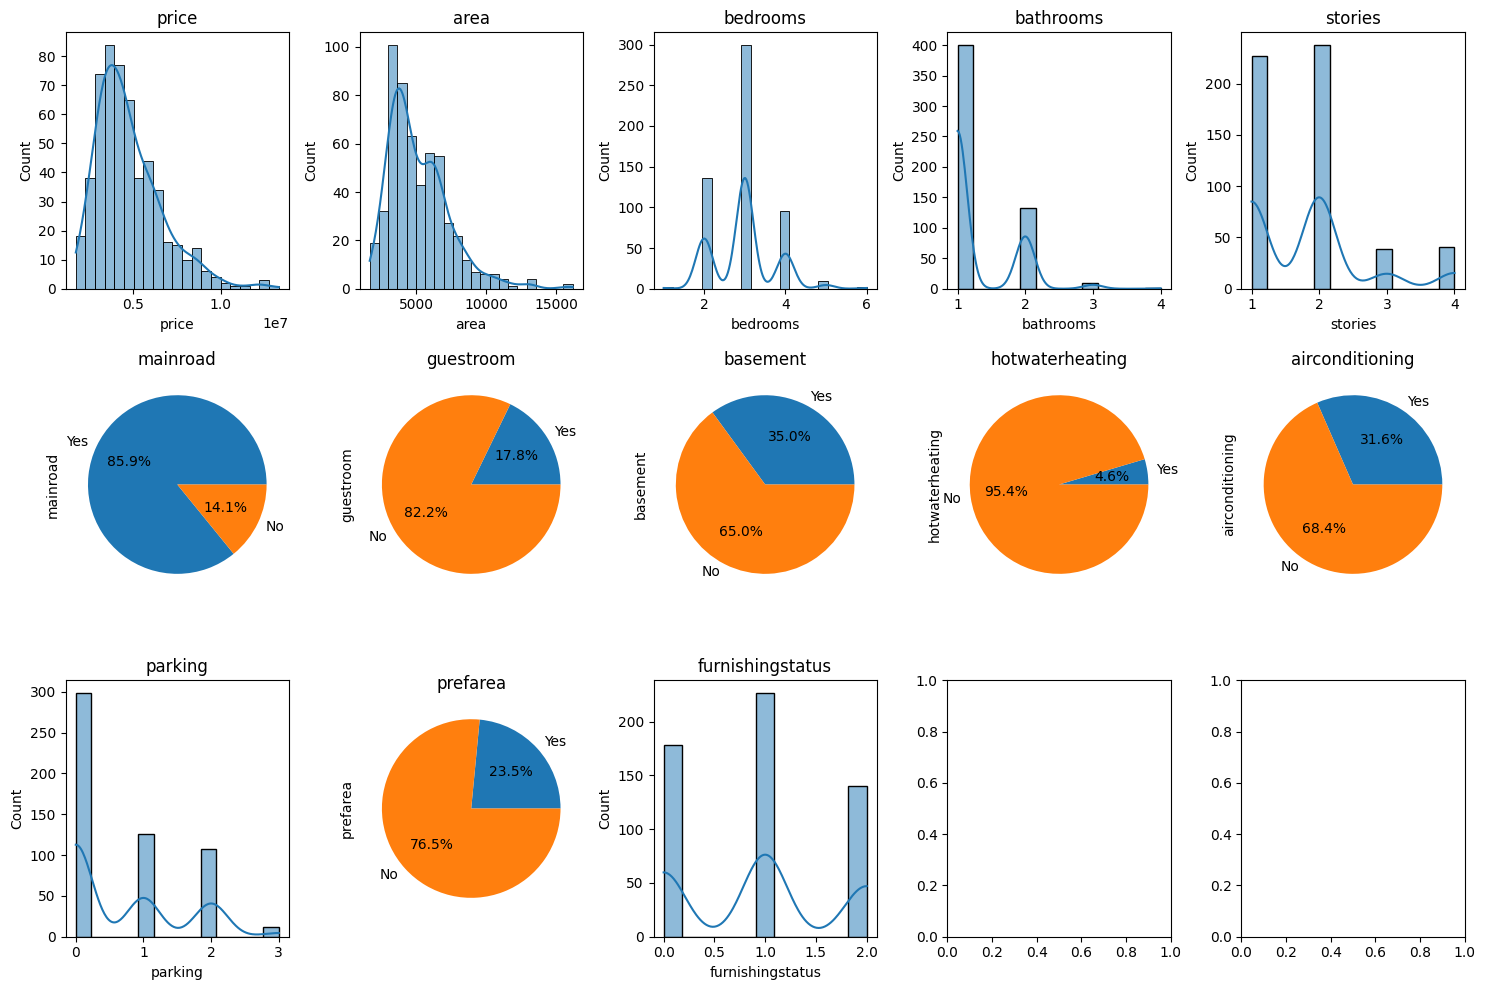

In [33]:
columns = df.columns
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))  # Create subplots with 4 row and 3 columns    
# plot distributions fo 11 categorical variables
for i in range(13):
    x = i//5
    y = i - (x*5)
    # pie chart for binary categories
    if(len(df[columns[i]].unique()) == 2):
        count_yes = df.loc[df[columns[i]] == 1][columns[i]].count()
        count_no = df.loc[df[columns[i]] == 0][columns[i]].count()
        temp_df = pd.DataFrame({columns[i] : [count_yes/len(df), count_no/len(df)]}, 
                     index=['Yes', 'No'])
        temp_df.plot.pie(ax=axes[x,y], y=columns[i], autopct='%1.1f%%', legend=False).set_title(columns[i])
    # histogram for non-binary categories
    else:
        sns.histplot(x=columns[i], data=df, kde=True, ax=axes[x,y]).set_title(columns[i])
plt.tight_layout()
plt.show()

some categorical features have skew, may consider oversampling

# Preprocessing Data Function

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def preprocess_data(df, standardize=False, oversample=False):
    X = df.drop('price' , axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=321)

    if oversample:
        ros = RandomOverSampler(random_state=123)
        X_train, y_train = ros.fit_resample(X_train, y_train)
    
    if standardize: # standardizing scale of features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [86]:
X_train, X_test, y_train, y_test = preprocess_data(df, standardize=True)

In [87]:
# Train 
LReg = LinearRegression()
LReg = LReg.fit(X_train, y_train)

In [88]:
# Evaluate
y_pred_linear = LReg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_linear, squared=False) 
r2 = r2_score(y_test, y_pred_linear)
print('Root Mean Squared Error:', round(rmse, 2))
print('R^2:', round(r2, 4))
percent_error = rmse/df['price'].mean()
print('Average percent error: '+ (percent_error*100).round(2).astype(str) + '%')

Root Mean Squared Error: 1137988.8
R^2: 0.6547
Average percent error: 23.87%


In [50]:
# Plots predicted vs. actual values with lines showing perfect prediction and actual regression line
def pred_actual_line(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

    # Calculate and plot a regression line
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m*y_test + b, color='coral', label='Regression Line')

    plt.legend()
    plt.show()

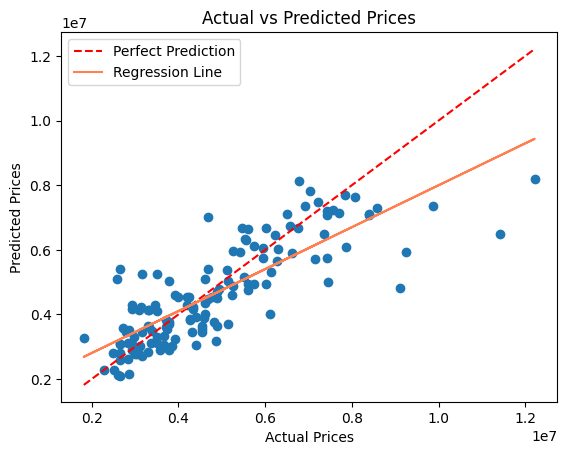

In [51]:
pred_actual_line(y_test, y_pred_linear)

### After Oversampling

In [52]:
X_train, X_test, y_train, y_test = preprocess_data(df, oversample=True, standardize=True)

In [53]:
# Train 
LReg = LinearRegression()
LReg = LReg.fit(X_train, y_train)

In [68]:
# Evaluate
y_pred_linear = LReg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_linear, squared=False) 
r2 = r2_score(y_test, y_pred_linear)
print('Root Mean Squared Error:', round(rmse, 2))
print('R^2:', round(r2, 4))
percent_error = rmse/df['price'].mean()
print('Average percent error: '+ (percent_error*100).round(2).astype(str) + '%')

Root Mean Squared Error: 1125625.6
R^2: 0.6622
Average percent error: 23.61%


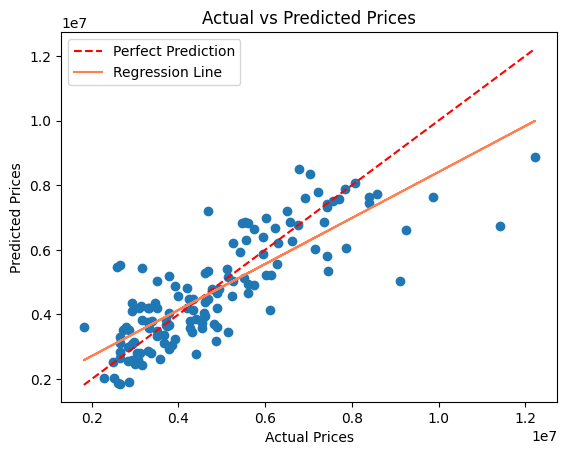

In [21]:
pred_actual_line(y_test, y_pred_linear)

# Random Forest Regression

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [71]:
# no need to standardize for Random Forest
X_train, X_test, y_train, y_test = preprocess_data(df)

In [72]:
# Train Data
RFRegressor = RandomForestRegressor()
RFRegressor = RFRegressor.fit(X_train,y_train)

In [76]:
# Evaluate model
y_pred_RF = RFRegressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_RF, squared=False) 
r2 = r2_score(y_test, y_pred_RF)
print('Root Mean Squared Error:', round(rmse, 2))
print('R^2:', round(r2, 4)
percent_error = rmse/df['price'].mean()
print('Average percent error: '+ (percent_error*100).round(2).astype(str) + '%')

Root Mean Squared Error: 1210189.09
R^2: 0.61
Average percent error: 25.39%


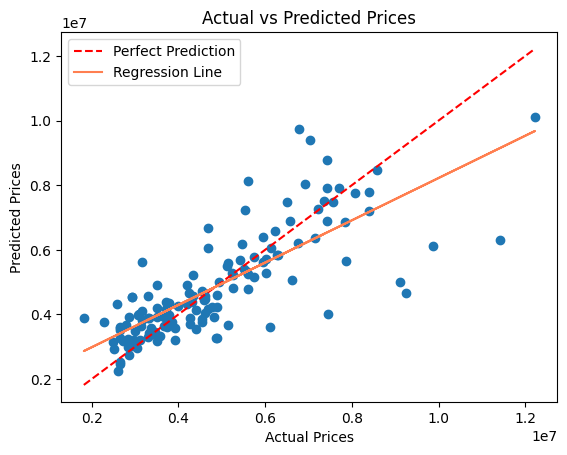

In [77]:
pred_actual_line(y_test, y_pred_RF)

### After Oversampling

In [78]:
X_train, X_test, y_train, y_test = preprocess_data(df, oversample=True)

In [79]:
# Train Data
RFRegressor = RandomForestRegressor()
RFRegressor = RFRegressor.fit(X_train,y_train)

In [81]:
# Evaluate model
y_pred_RF = RFRegressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_RF, squared=False) 
r2 = r2_score(y_test, y_pred_RF)
print('Root Mean Squared Error:', round(rmse, 2))
print('R^2:', round(r2, 4))
percent_error = rmse/df['price'].mean()
print('Average percent error: '+ (percent_error*100).round(2).astype(str) + '%')

Root Mean Squared Error: 1426476.67
R^2: 0.4575
Average percent error: 29.93%
